# Introduction to Anaconda

## Installing Anaconda

<b>Step 1</b> Install Anaconda:

- Windows: Follow this guide https://docs.anaconda.com/anaconda/install/windows/
- Linux: Follow this guide https://docs.anaconda.com/anaconda/install/linux/
- macOS: Follow this guide https://docs.anaconda.com/anaconda/install/mac-os/ 

<b>Note</b> In this course we will use Python 3.10. Don't worry if the guide mentions Python 3.7, if you follow the instructions you should be able to get the latest Python installation.

Verify that your installation was successful: 

- Windows: Open the 'Anaconda Prompt' (just type it in the Windows search bar). It should open a shell similar the Command Prompt, but displaying `(base)`.

- Linux and macOS: Open the terminal, now it should display `(base)` before the local path.

You can check the version of your `base` Python environment by using `python --version`.

Even if it's not Python 3.10, don't worry, we will not be using the `base` environment (see the rest of the tutorial).

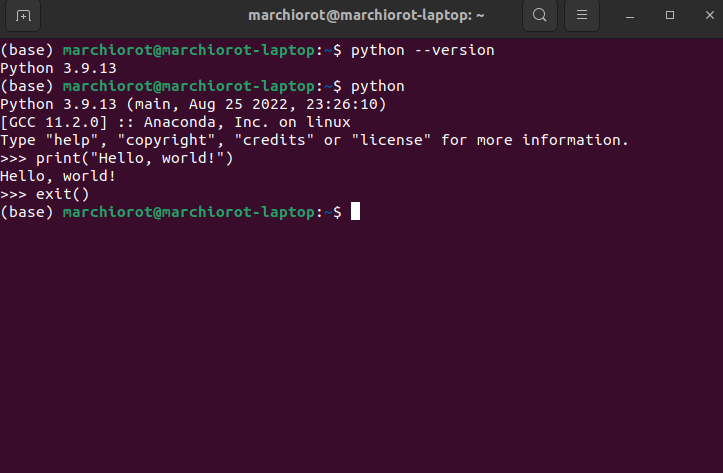

## Setting up your Conda environment

<b>Anaconda</b> (or just Conda) will be your best friend when you are using Python.
It allows to create virtual environments that contain sandboxed Python installations.
This way, you don't need to wipe out and reinstall Python every time you mess up with your environment.
Furthermore, Conda environments allow to have multiple Python installations at the same time, and in each of them you can have different versions of Python or different libraries/packages.

Nice, uh? Moreover, you can install a specific environment from a text file with the following command:

<code>conda env create --name hy673 --file [filename].txt</code>  

You can the command above to install the environment specified in `environment.txt`. 
<b>WARNING</b> Use it only if you want to install Pytorch with CUDA drivers (which allow to run Pytorch on GPU). In case you do not have a Nvidia GPU, or you do not have the CUDA drivers required to run Pytorch on GPU, just follow the instruction below.


### Alternative setup

In order to create an environment with all the necessary packages, you can run the following commands in order:
1) Create a new environment named 'hy673' with Python 3.10

`conda create --name hy673 python=3.10`

2) Switch to your environment

`conda activate hy673`

<b>IMPORTANT</b> You have to use this command every time you start Anaconda. Otherwise, the default environment will be 'base'. Of course you can work on 'base', but I would advise against it: this is a "special" environment that you cannot wipe out like the others, unless you uninstall Anaconda.

3) Install some useful packages

`conda install numpy pandas matplotlib scikit-learn tqdm`

4) Install the most important package, i.e., Pytorch. If you just want regular installation which runs only on CPU, you can use

`conda install pytorch torchvision torchaudio cpuonly -c pytorch`

Otherwise, you can generate the command for a custom installation at the following link https://pytorch.org/

## Jupyter and Python IDEs

In this tutorial, and likely also in the next ones, we will be using Jupyter notebooks to run Python code.
Jupyter notebooks have multiple advantages, like:
- They allow to divide your code in separate cells and run those 
- Cells can either contain Python code or Markdown, allowing to combine code with nice mathematical equations
\begin{equation*}
e^{i\pi} + 1 = 0
\end{equation*}

<b>Installation</b> The easiest way to install Jupyter is by running on your `hy673` conda environment

`conda install jupyter`

Once you do that, you can run the command

`jupyter-notebook`

to start a session in Jupyter. This should open automatically in your browser. If that does not happen, you can check the output on the terminal, where you should see a line like

`Jupyter Notebook 6.4.12 is running at: http://localhost:8889/?token=****************************`

and copy the link on your browser.

If you are already using an IDE like PyCharm or VSCode to run Python code, you can use the Jupyter extension to open the notebooks:
- PyCharm (only Professional edition): https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html 
- VSCode: https://marketplace.visualstudio.com/items?itemName=ms-toolsai.jupyter

## Verifying your installation

Now that you have set up Anaconda, the `hy673` environment, and Jupyter, you can check that everything is working fine.
You may start by opening this Jupyter notebook and run the cell below.
If it doesn't raise any error, then you are on a good track: it means that you have installed the most important packages. Congrats!

In [ ]:
import os
import sys
import tqdm # this is not super important actually, but you can use it to display the progress of long for loops
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import torch

Everything ran smoothly? Nice!

Now you can try to run this other cell below, which verifies that all the packages are at the right version.
Even if they are not, it shouldn't be a major problem, but if you're not sure you can always ask your TA :)

In [ ]:
require_dict = {
    'python': '3.10.9',
    'numpy': '1.23.5',
    'pandas': '1.5.2',
    'matplotlib': '3.6.2',
    'scikit-learn': '1.2.0',
    'pytorch': '1.13.1',
}

version_dict = {
    'python': sys.version.split(" (")[0],
    'numpy': np.__version__,
    'pandas': pd.__version__,
    'matplotlib': matplotlib.__version__,
    'scikit-learn': sklearn.__version__,
    'pytorch': torch.__version__,
}


all_passed = True

for key in require_dict:

    if version_dict[key] == require_dict[key]:
        print(f"{key.capitalize()} version:", version_dict[key], '\tOK')
    else:
        all_passed = False
        print(f"WARNING! Wrong {key.capitalize()} version")
        print(f"Required: {key.capitalize()}", require_dict[key])
        print(f"Current: {key.capitalize()}", version_dict[key])

if all_passed:
    print("All packages are at the correct version!")

## Conda cheatsheet

As I mentioned above, Anaconda allows you to do a lot of things with your environments, like cloning them, deleting them, restoring them to a previous state.

You can find the complete list of commands at the following URL: https://docs.conda.io/projects/conda/en/4.6.0/_downloads/52a95608c49671267e40c689e0bc00ca/conda-cheatsheet.pdf

However, here are some notable ones:
- Create an environment

`conda create --name [env-name]`

- List all the environments

`conda env list`

- Activate an environment

`conda activate [env-name]`

- Remove an environment

`conda env remove --name [env-name]`

- Restore the environment to a previous state (revision)

`conda install -- revision [revision-id]`

You may wonder what in the world is the `revision-id`. Well, every time you make some changes to your environment, these changes will be logged in a 'revision', which will be identified by a number. To see the list of all revision you can use the comment

`conda list --revisions`

For example, suppose you accidentally installed the Plotly package instead of Matplotlib.
You can run `conda list --revisions` to display all the revisions and find the one in which Plotly was installed.

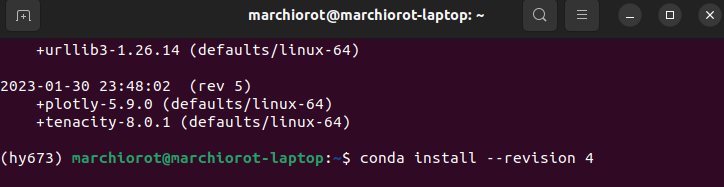

Once you realize Plotly was installed during revision 5, you can just run `conda install -- revision 4` to restore the environment to the previous state, before the damage was done.
